In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Прочитайте csv файл (використовуйте функцію read_csv)

In [ ]:
df = pd.read_csv('/content/bestsellers with categories.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


- Виведіть перші п'ять рядків (використовується функція head)

In [ ]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


- Виведіть перші п'ять рядків (використовується функція head)

In [ ]:
df.shape

(550, 7)

- **Відповідь**: Про скільки книг зберігає дані датасет?

In [ ]:
df.shape[0]

550

In [ ]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

- Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [ ]:
spaces = df.isnull()
res = pd.DataFrame()
res['amount_of_spaces'] = np.sum(spaces)
res

,amount_of_spaces
name,0
author,0
user_rating,0
reviews,0
price,0
year,0
genre,0


- **Відповідь**: Чи є в якихось змінних пропуски? (Так / ні) - Ні


- Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [ ]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

 - **Відповідь**: Які є унікальні жанри?

'Non Fiction', 'Fiction'

 - Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

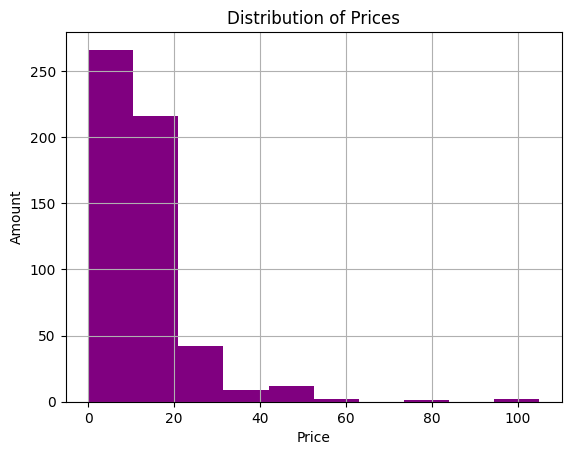

In [ ]:
plt.hist(df['price'], color='purple')
plt.xlabel('Price')
plt.ylabel('Amount')
plt.title('Distribution of Prices')
plt.grid()
plt.show()

- Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [ ]:
print("Максимальна ціна:", df['price'].max())
print("Мінімальна ціна:", df['price'].min())
print("Середня ціна:", df['price'].mean())
print("Медіанна ціна:", df['price'].median())

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


- **Відповідь**: Максимальна ціна?

105

- **Відповідь**: Мінімальна ціна?

0

- **Відповідь**: Середня ціна?

13.1

- **Відповідь**: Медіанна ціна?

11.0

- **Відповідь**: Який рейтинг у датасеті найвищий? Відповідь: **4.9**

In [ ]:
max_rating = df['user_rating'].max()
max_rating

4.9

- **Відповідь**: Скільки книг мають такий рейтинг? Відповідь: **52**

In [ ]:
# res = []
# for i in df['user_rating']:
#   if i == df['user_rating'].max():
#     res.append(i)
# len(res)
df[df['user_rating'] == max_rating].__len__()

52

- **Відповідь**: Яка книга має найбільше відгуків? Відповідь: **Where the Crawdads Sing**

In [ ]:
df.loc[df['reviews'] == df['reviews'].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


- Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: **Publication Manual of the American Psychologic...**

In [ ]:
top = df[df['year'] == 2015].sort_values(by='user_rating', ascending=False).head(50)
top_expensive = top[top['price'] == top['price'].max()]
top_expensive

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


- **Відповідь**: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: **550**

In [ ]:
df[(df['genre'] == 'Fiction') & (df['year'] == 2010)]
df.__len__()

550

- **Відповідь**: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: **1**

In [ ]:
book = len(df[df['year'].isin([2010, 2011]) & (df['user_rating'] == 4.9)])
book


1

- І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [ ]:
books_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')

- **Відповідь**: Яка книга остання у відсортованому списку? Відповідь: **Old School (Diary of a Wimpy Kid #10)**

In [ ]:
#books_2015
last_book = books_2015.iloc[-1]['name']
last_book

'Old School (Diary of a Wimpy Kid #10)'

- Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [ ]:
df.groupby('genre').agg({'price': ['min', 'max']})

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

- **Відповідь**: Максимальна ціна для жанру Fiction: Відповідь **82**

- **Відповідь**: Мінімальна ціна для жанру Fiction: **0**

- **Відповідь**: Максимальна ціна для жанру Non Fiction: Відповідь **105**

- **Відповідь**: Мінімальна ціна для жанру Non Fiction: Відповідь **0**

- Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [ ]:
#df.groupby('author').agg({'name': ['count']})
books = df.groupby('author')['name'].count().reset_index()
books.columns = ['author', 'amount']
books

,author,amount
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


- **Відповідь**: Якої розмірності вийшла таблиця? Відповідь: **248 rows × 2 columns**

- **Відповідь**: Який автор має найбільше книг? Відповідь: **Jeff Kinney**

In [ ]:
books[books['amount'] == books['amount'].max()]

,author,amount
120,Jeff Kinney,12


- **Відповідь**: Скільки книг цього автора? Відповідь: **12**

- Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [ ]:
# rating = df.groupby('author')['user_rating'].mean()
# rating
# rating_1 = df.groupby('author').agg({'user_rating': ['mean']})
# rating_1
rating_avg = df[['author', 'user_rating']].groupby('author').agg('mean').reset_index()
rating_avg


,author,user_rating
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


- **Відповідь**: У якого автора середній рейтинг мінімальний? Відповідь: **Donna Tartt**

In [ ]:
author_min = rating_avg.loc[rating_avg['user_rating'] == rating_avg['user_rating'].min()]
author_min


,author,user_rating
71,Donna Tartt,3.9


- **Відповідь**: Який у цього автора середній рейтинг? Відповідь: **3.9**

In [ ]:
rating_avg[rating_avg['author'] == 'Donna Tartt']['user_rating'].mean()

3.9

- З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [ ]:
new_table = pd.concat([books, rating_avg['user_rating'].round(2)], axis=1)
new_table

,author,amount,user_rating
0,Abraham Verghese,2,4.60
1,Adam Gasiewski,1,4.40
2,Adam Mansbach,1,4.80
3,Adir Levy,1,4.80
4,Admiral William H. McRaven,1,4.70
...,...,...,...
243,Walter Isaacson,3,4.57
244,William Davis,2,4.40
245,William P. Young,2,4.60
246,Wizards RPG Team,3,4.80


- Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [ ]:
new_table.sort_values(by=['amount', 'user_rating'])

,author,amount,user_rating
171,Muriel Barbery,1,4.00
43,Chris Cleave,1,4.10
109,Ian K. Smith M.D.,1,4.10
186,Pierre Dukan,1,4.10
81,Elizabeth Strout,1,4.20
...,...,...,...
11,American Psychological Association,10,4.50
226,Suzanne Collins,11,4.66
92,Gary Chapman,11,4.74
197,Rick Riordan,11,4.77


- **Відповідь**: Який автор перший у списку? **Muriel Barbery**


Text(0.5, 1.0, 'Залежність ціни від року випуску')

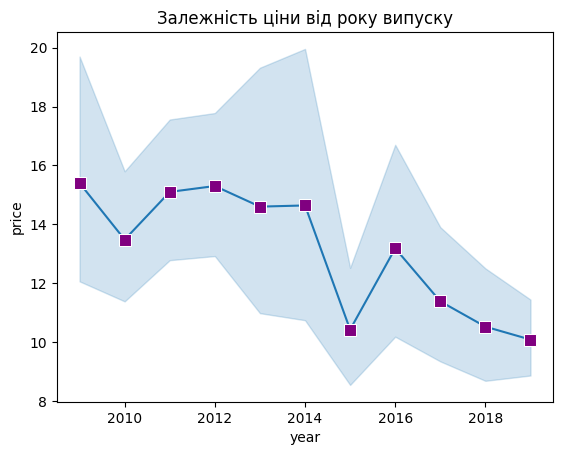

In [ ]:
sns.lineplot(y="price", x="year", data=df, marker='s', ms='8', mfc='purple')
plt.title('Залежність ціни від року випуску')

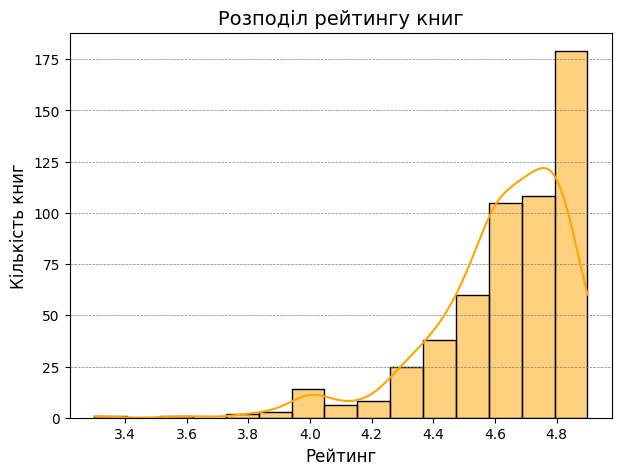

In [ ]:
plt.figure(figsize=(7,5))
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', zorder=0, axis='y')
sns.histplot(data=df, x='user_rating', bins=15, kde=True, color='orange')
plt.title('Розподіл рейтингу книг', fontsize=14)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Кількість книг', fontsize=12)
plt.show()

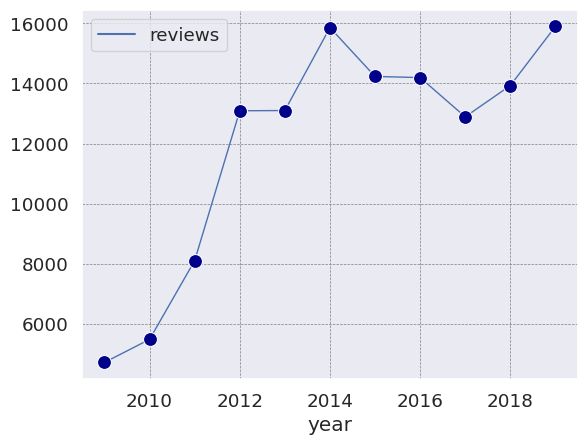

In [ ]:
rev_year = df.groupby("year").agg({"reviews" : "mean"})

sns.set(style='darkgrid', font_scale=1.2)
sns.lineplot(data=rev_year, marker = 'o', ms='10', mfc = 'darkblue', linewidth = '1')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)